This Notebook accompanies the submission of the paper "Causal Discovery in Time Series Data Using Causally Invariant Locally Linear Models" submitted to the NeuRIPS 2022 Workshop "A Causal View on Dynamical Systems". Running this Notebook in order will create all figures of the appendix.

In [2]:
### Some initializations
import numpy as np
import math
import random
import copy
import matplotlib.pyplot as plt
import scipy
from sklearn import linear_model
from group_lasso import GroupLasso
import warnings
import itertools
# warnings.filterwarnings("ignore")

Lambda 1 of 6
Lambda 2 of 6
Lambda 3 of 6
Lambda 4 of 6
Lambda 5 of 6
Lambda 6 of 6


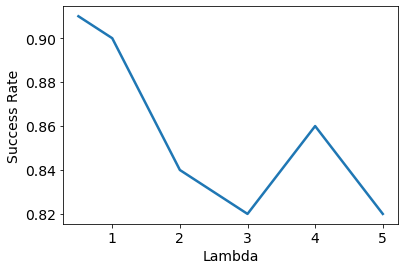

In [47]:
### Here we use VAR data to create Figure 3a in the Appendix

## Here we generate the data
I=1000  #Number of intervals, which leaves a model sample size (hat(n)) of 4
lambdas=[0.5,1,2,3,4,5]
sample_size=np.zeros(len(lambdas))
runs=100
success4=np.zeros(len(lambdas))
n_switch=40  #Ground truth sample size
diff=np.zeros(len(Intervals))
np.random.seed(0)
d=5 #Dimensionality
target=1 #Target covariate
length=4000  #Total length of the time series
for p,lam in enumerate(lambdas):
    print('Lambda',p+1,'of',len(lambdas))
    for r in range(runs):
        n=length//I  #Model sample size (hat(n))
        sample_size[p]=n
        series=np.zeros((length,d))
        x=np.zeros((I,n,d))
        y=np.zeros((I,n))
        A=np.array([[0.5,-0.7,0,0,0.9],[0,0.4,1,0,0.5],[0,0,-0.9,0,0],[0,0.5,0,0.8,-1],[0,0,0,0,0.4]])
        supp=copy.copy(A)
        supp[supp!=0]=1
        non_supp=np.argwhere(A == 0)
        mean=np.zeros((d))
        cov=np.eye(d)
        series[0]=np.random.multivariate_normal(mean,4*np.eye(d))
        count=1
        i=-1
        b=np.random.uniform(low=0,high=30)
        a=np.random.uniform(low=-30,high=0)
        for j in range(0,n*I-1):
            series[j+1] =np.matmul(series[j],A)
            series[j+1,np.delete(np.array([0,1,2,3,4]),target)] =series[j+1,np.delete(np.array([0,1,2,3,4]),target)]+ np.random.uniform(low=a,high=b,size=(d-1))
            A=A+np.random.normal(loc=-0.001,scale=0.001,size=(5,5))*supp
            A[A>0.9]=0.8
            A[A<-0.9]=-0.8
            if j%n_switch==0:
                b=np.random.uniform(low=0,high=30)
                a=np.random.uniform(low=-30,high=0)
            if j%n==0:
                i+=1
            x[i,j-i*n,:]=series[j,:]
            y[i,j-i*n]=series[j+1,target]
            y[i,j-i*n]=series[j+1,target]+np.random.normal(loc=0,scale=1)

        ## Here we perform the variance test
        R=np.zeros((I,n))
        a=[list(itertools.combinations((0,1,2,3,4), k)) for k in range(0,d)]
        subsets = [item for sublist in a for item in sublist]
        dic={}

        for ind in subsets:
            for i in range(I):
                if len(ind)==0:
                    R[i,:]=y[i,:]
                else:
                    ind=np.array(ind)
                    beta_hat=np.linalg.inv(x[i,:,ind]@x[i,:,ind].T+lam*np.eye(len(ind)))@(x[i,:,ind])@y[i,:]
                    R[i,:]=y[i,:]-x[i,:,ind].T@beta_hat


            dic[tuple(ind)]=copy.copy(R)
        S_ini=[]
        for k in dic:
            Res=dic[k]
            if np.var(np.var(Res,axis=1))<1:
                S_ini.append(k)
        plausibleS=[set(S_ini[k]) for k in range(len(S_ini))]
        if not not plausibleS:
            if tuple(set.intersection(*plausibleS))==tuple((np.argwhere(A[:,target]!=0).flatten())):
                success4[p]+=1
success4=success4/runs
fig, ax = plt.subplots()
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(14)
plt.plot(lambdas,success4,linewidth=2.5)
plt.xlabel('Lambda',fontsize=14)
plt.ylabel('Success Rate',fontsize=14)
plt.savefig('variationVARLargeLambda.eps', format='eps')

Noise 1 of 4


/tmp/ipykernel_344/1726791797.py:69: UserWarning: p-value floored: true value smaller than 0.001
  pval=scipy.stats.anderson_ksamp(Res)[2]
/tmp/ipykernel_344/1726791797.py:69: UserWarning: p-value capped: true value larger than 0.25
  pval=scipy.stats.anderson_ksamp(Res)[2]


Noise 2 of 4
Noise 3 of 4
Noise 4 of 4


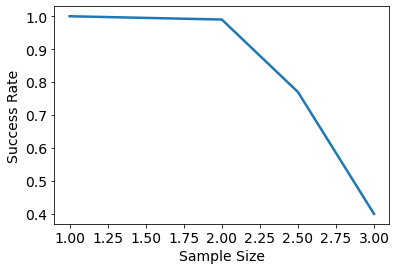

In [56]:
### Here we use VAR data to create Figure 3b in the Appendix


I=100  #Total modeled intervals, the modelled sample size will follow
runs=100
noises=[1,2,2.5,3]
success3=np.zeros(len(noises))
sample_size=np.zeros(len(noises))
n_switch=40  # Ground truth sample size per interval
np.random.seed(0)
d=5 #Dimensionality
target=1 #Target covariate
length=4000  #Total length of the time series
for p,noise in enumerate(noises):
    print('Noise',p+1,'of',len(noises))
    for r in range(runs):
        n=length//I  #Model sample size, equivalent to hat(n) in the paper
        sample_size[p]=n
        series=np.zeros((length,d))
        x=np.zeros((I,n,d))
        y=np.zeros((I,n))
        A=np.array([[0.5,-0.7,0,0,0.9],[0,0.4,1,0,0.5],[0,0,-0.9,0,0],[0,0.5,0,0.8,-1],[0,0,0,0,0.4]])
        supp=copy.copy(A)
        supp[supp!=0]=1
        non_supp=np.argwhere(A == 0)
        mean=np.zeros((d))
        cov=np.eye(d)
        series[0]=np.random.multivariate_normal(mean,4*np.eye(d))
        count=1
        i=-1
        b=np.random.uniform(low=0,high=30)
        a=np.random.uniform(low=-30,high=0)
        for j in range(0,n*I-1):
            series[j+1] =np.matmul(series[j],A)
            series[j+1,np.delete(np.array([0,1,2,3,4]),target)] =series[j+1,np.delete(np.array([0,1,2,3,4]),target)]+ np.random.uniform(low=a,high=b,size=(d-1))
            series[j+1,target] =series[j+1,target]+ np.random.uniform(low=-1,high=1)
            A=A+np.random.normal(loc=-0.0001,scale=0.001,size=(5,5))*supp
            A[A>0.9]=0.8
            A[A<-0.9]=-0.8
            if j%n_switch==0:
                b=np.random.uniform(low=0,high=30)
                a=np.random.uniform(low=-30,high=0)
            if j%n==0:
                i+=1
            x[i,j-i*n,:]=series[j,:]
            y[i,j-i*n]=series[j+1,target]
            y[i,j-i*n]=series[j+1,target]+np.random.normal(loc=0,scale=noise)

        ## Here we perform the hypothesis test
        R=np.zeros((I,n))
        a=[list(itertools.combinations((0,1,2,3,4), k)) for k in range(0,d)]
        subsets = [item for sublist in a for item in sublist]
        dic={}

        for ind in subsets:
            for i in range(I):
                if len(ind)==0:
                    R[i,:]=y[i,:]
                else:
                    ind=np.array(ind)
                    beta_hat=np.linalg.inv(x[i,:,ind]@x[i,:,ind].T+0.01*np.eye(len(ind)))@(x[i,:,ind])@y[i,:]
                    R[i,:]=y[i,:]-x[i,:,ind].T@beta_hat


            dic[tuple(ind)]=copy.copy(R)
        S_ini=[]
        for k in dic:
            Res=dic[k]
            pval=scipy.stats.anderson_ksamp(Res)[2]
            if pval>0.05:
                S_ini.append(k)
        plausibleS=[set(S_ini[k]) for k in range(len(S_ini))]
        if not not plausibleS:
            if tuple(set.intersection(*plausibleS))==tuple((np.argwhere(A[:,target]!=0).flatten())):
                success3[p]+=1

success3=success3/runs
fig, ax = plt.subplots()
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(14)
plt.plot([v**2 for v in noises],success3,linewidth=2.5)
plt.xlabel('Noise Variance',fontsize=14)
plt.ylabel('Success Rate',fontsize=14)
plt.savefig('andersonVARlargenoise.eps', format='eps')